## Formulação do problema 1

 1 - Escreva um programa de computador (Fortran, C++ ou Python) para resolver o
 problema de sedimentação de uma esfera em baixo Reynolds na sua forma adimensional
 e compare sua solução com a solução analítica;


 Como há uma comparação com a analítica, supõe-se que se deva fazer a mesma consideração que a disposta no slide, de que por baixo Reynolds, pode-se supor $Re \approx 0$, de fato o que se pretende resolver inicialmente é:

 $st \frac{dv^*_z}{dt*}=-v_z^*+1$

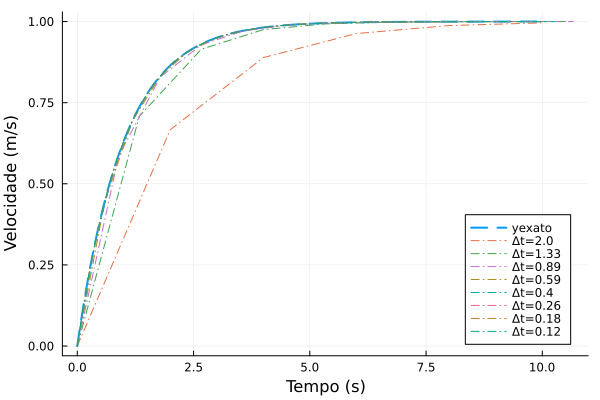

In [36]:
using Plots
tmax = 10
st =1
function calculonum(Δt, tmax, st)
  y_n = 0
  t_n = 0
  ye= 0
  t = 0
  k1=k2=k3=k4 = 0
  function f(t,y)
    return (-y+1)/st
  end

  y = []
  yexato =  []
  tp = []


  while t<tmax
    push!(y,y_n)
    push!(tp, t)
    k1 = f(t_n,y_n)
    k2 = f(t_n+Δt/2,y_n+k1*Δt/2)
    k3 = f(t_n+Δt/2,y_n+k2*Δt/2)
    k4 = f( t_n+Δt/2, y_n+k3*Δt)
    ym1 = y_n +Δt*(k1+2*k2+2*k3+k4)/6


    t = t+Δt


    y_n = ym1
    t_n = t
  end

  push!(y,y_n)
  push!(yexato, ye)
  push!(tp, t)

  return tp,  y

end

tp2 = range(0, tmax,1000)
yexato2   =@. 1-ℯ^(-tp2/st)

p1 = plot(tp2,yexato2, ylabel = "Velocidade (m/s)", xlabel = "Tempo (s)", label = "yexato", linewidth =2, linestyle = :dash )

for x in range(0,7)
  Δt = 2*1.5^(-x)

  tp,  y = calculonum(Δt, tmax, st)

  plot!(p1, tp, y, label = "Δt=$(round(Δt, digits=2)) ", linestyle = :dashdot)


end
display(p1)

$m_p \frac{dv_z}{Δt} = -6\pi\eta a v_z- \frac{9}{4} \pi \rho_f a^2 v_z^2+\frac{4}{3} \pi a^3  \Delta \rho g$

Dados: $v_z^* = \frac{v_z}{vs}$,   $t^* = t a/v_s$, $St = \frac{m_p v_s}{6 \pi \eta a^2} $ e $6\pi\eta a  v_s=\frac{4}{3} \pi a^3  \Delta \rho g$


$m_p \frac{v_s^2}{a} \frac{dv_z^*}{Δt^*}  = -6\pi\eta a  v_s v_z^*    - \frac{9}{4} \pi \rho_f a^2 v_s^2 v_z^{*2}+\frac{4}{3} \pi a^3  \Delta \rho g$, divindo-se a equação por $6\pi\eta a  v_s$:

$St \frac{dv_z^*}{Δt^*} = -v_z^* -  \frac{3}{8} \frac{ \rho_f a v_s }{\eta}v_z^{*2} +\frac{2}{9}  \frac{a^2  \Delta \rho g}{\eta u_s} $

$St \frac{dv_z^*}{Δt^*} = -v_z^* -  \frac{3}{8} Re v_z^{*2} +1 $

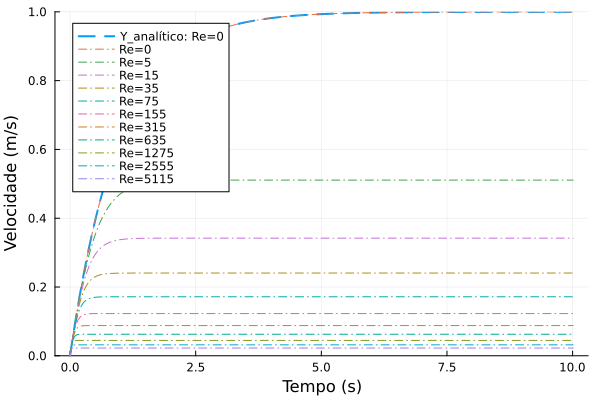

In [38]:
tmax = 10
st =1
Re=1
function calculonum2(Δt, tmax, st, Re)
  y_n = 0
  t_n = 0
  ye= 0
  t = 0
  k1=k2=k3=k4 = 0
  function f(t,y)
    return (-y-3/8*Re*y^2+1)/st
  end

  y = []
  yexato =  []
  tp = []


  while t<tmax
    push!(y,y_n)
    push!(tp, t)
    k1 = f(t_n,y_n)
    k2 = f(t_n+Δt/2,y_n+k1*Δt/2)
    k3 = f(t_n+Δt/2,y_n+k2*Δt/2)
    k4 = f( t_n+Δt/2, y_n+k3*Δt)
    ym1 = y_n +Δt*(k1+2*k2+2*k3+k4)/6


    t = t+Δt


    y_n = ym1
    t_n = t
  end

  push!(y,y_n)
  push!(yexato, ye)
  push!(tp, t)

  return tp,  y

end
tp2 = 0
tp2 = range(0, tmax,1000)
yexato2   =@. 1-ℯ^(-tp2/st)

p1 = plot(tp2,yexato2, ylabel = "Velocidade (m/s)", xlabel = "Tempo (s)", label = "Y_analítico: Re=0", linewidth =2, ylims=(0,1), linestyle = :dash )

for x in range(0,10)
  Δt = 0.01
  Re = 5*2^(x)-5

  tp,  y = calculonum2(Δt, tmax, st, Re)

  plot!(p1, tp, y, label = "Re=$(round(Int, Re))", linestyle= :dashdot)



end
display(p1)